### Try this notebook in Google Colab, Binder or SageMaker!

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/InsightSoftwareConsortium/itkwidgets/blob/main/examples/integrations/itk/PointSet.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/InsightSoftwareConsortium/itkwidgets/HEAD?labpath=examples%2Fintegrations%2Fitk%2FPointSet.ipynb)
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github.com/InsightSoftwareConsortium/itkwidgets/blob/main/examples/integrations/itk/PointSet.ipynb)

In [1]:
import sys, os

!{sys.executable} -m pip install -q "itk>=5.3.0" "itkwidgets[all]>=1.0a21"

In [2]:
import itk
import pooch
import numpy as np
from itkwidgets import view

CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)


In [3]:
# Download data
files = pooch.retrieve(
    url='https://examples.itk.org/src/core/transform/deformavolumewithathinplatespline/DeformAVolumeWithAThinPlateSpline.zip',
    known_hash='sha256:f01ea2e7fc91cc8e832397e46b18d2b62b74de306a5ba7a4d441837aaeea7e8d',
    processor=pooch.Unzip(), path="./", fname="ThinPlateSpline", progressbar=True)
file_path = os.path.commonpath(files)

In [4]:
source_landmarks = os.path.join(file_path, "SourceLandmarks.vtk")
target_landmarks = os.path.join(file_path, "TargetLandmarks.vtk")
input_image = os.path.join(file_path, "brainweb165a10f17.mha")
deformed_image = os.path.join(file_path, "DeformedImage.png")
checker_board_image = os.path.join(file_path, "CheckerBoard.png")

In [5]:
Dimension = 3
thin_plate_spline = itk.ThinPlateSplineKernelTransform[itk.D, Dimension].New()

In [6]:
source_landmarks_mesh = itk.meshread(source_landmarks)
# Cast points from float32 to float64
points = itk.array_from_vector_container(source_landmarks_mesh.GetPoints())
points = points.astype(np.float64)
source_landmarks = thin_plate_spline.GetSourceLandmarks()
source_landmarks.SetPoints(itk.vector_container_from_array(points.flatten()))


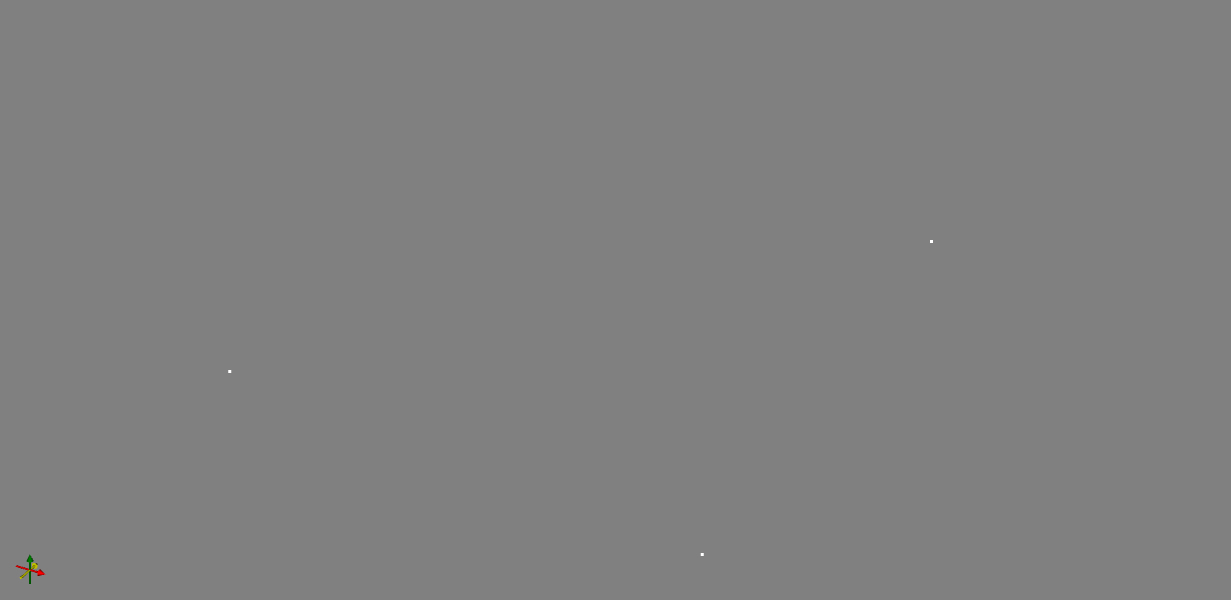
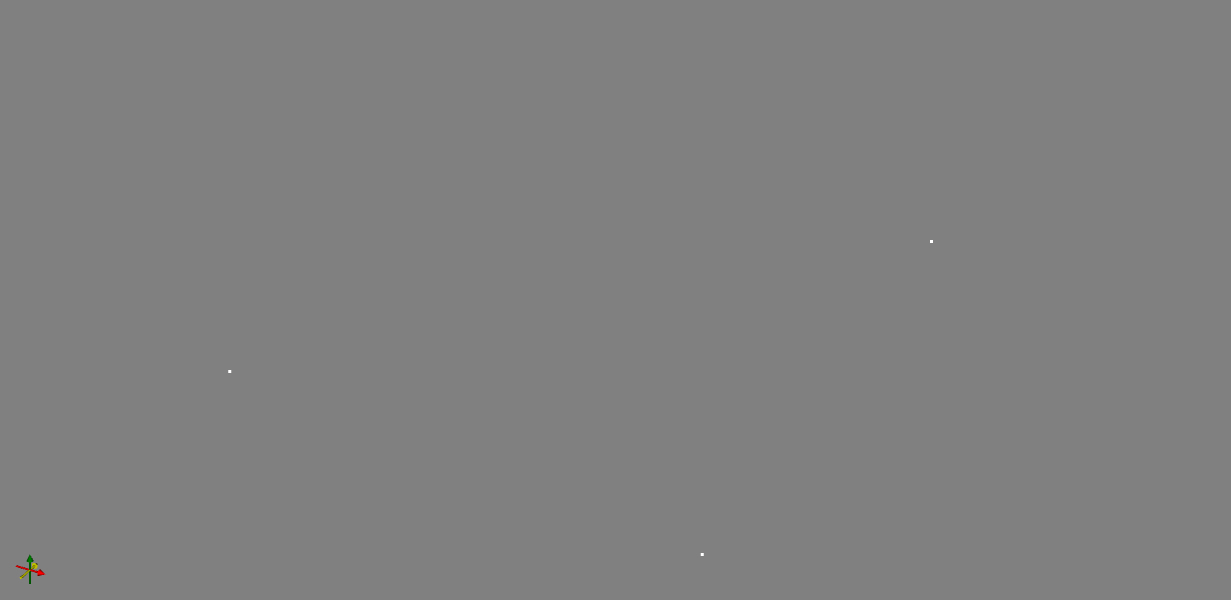

<IPython.core.display.Javascript object>

In [7]:
view(point_sets=source_landmarks)

In [8]:
target_landmarks_mesh = itk.meshread(target_landmarks)
# Cast points from float32 to float64
points = itk.array_from_vector_container(target_landmarks_mesh.GetPoints())
points = points.astype(np.float64)
target_landmarks = thin_plate_spline.GetTargetLandmarks()
target_landmarks.SetPoints(itk.vector_container_from_array(points.flatten()))


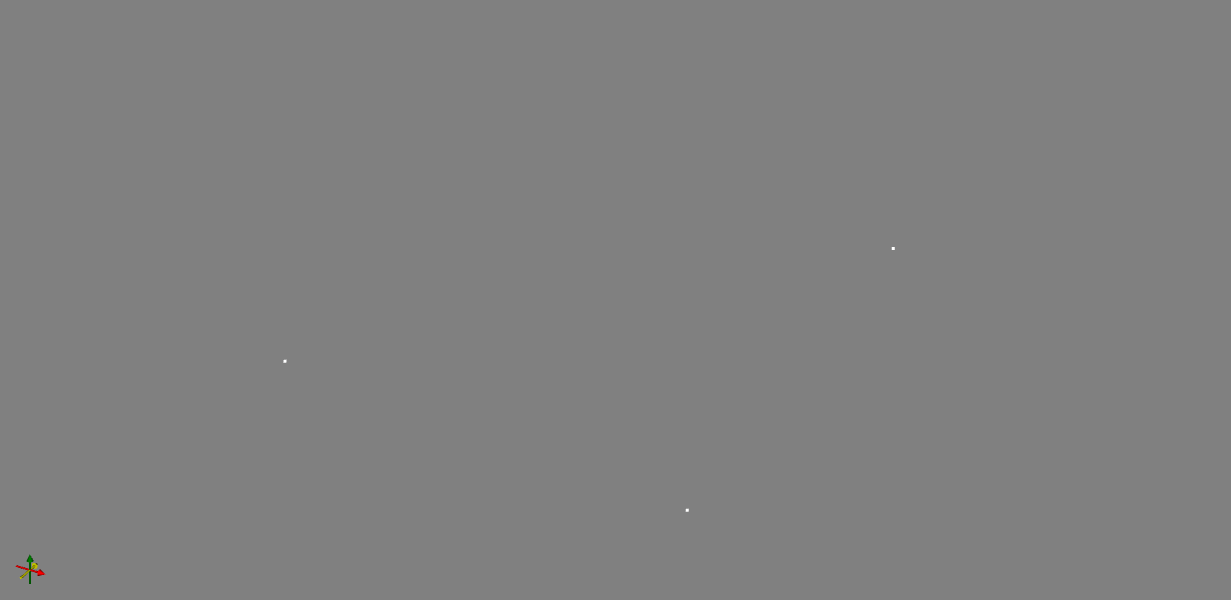
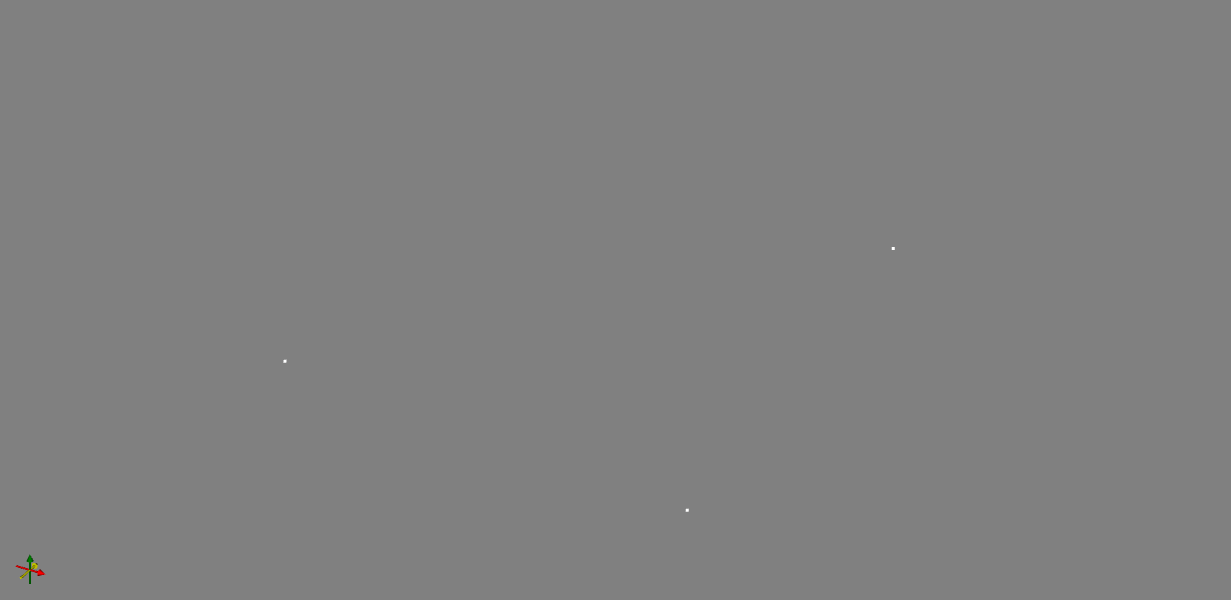

<IPython.core.display.Javascript object>

In [9]:
view(point_sets=target_landmarks)

In [10]:
thin_plate_spline.ComputeWMatrix()

input_image = itk.imread(input_image)


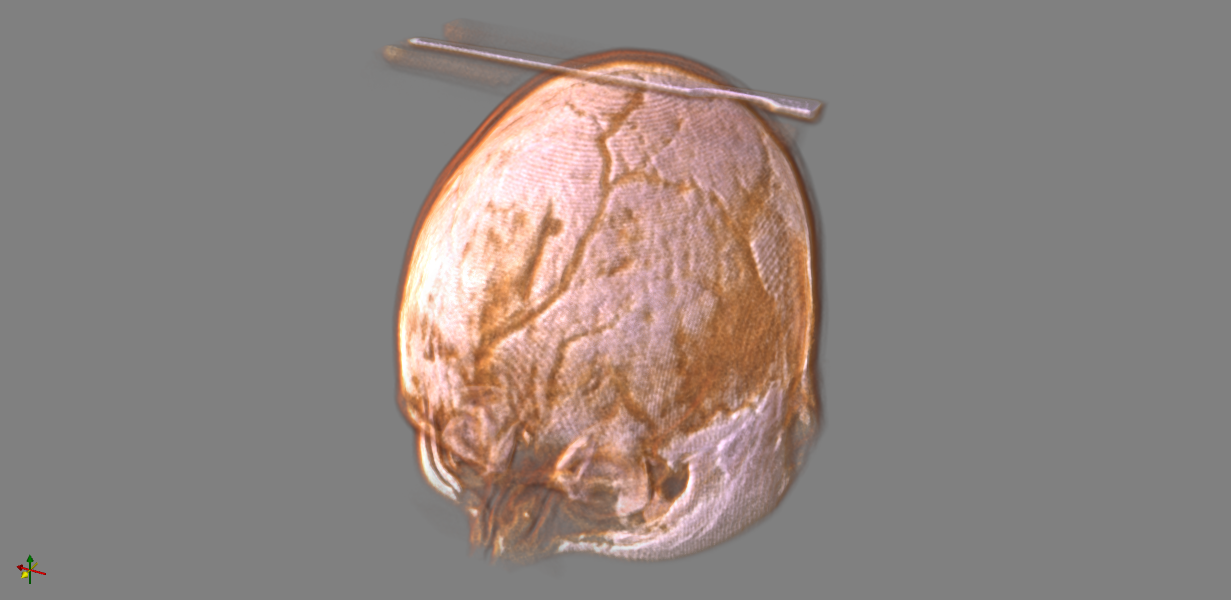
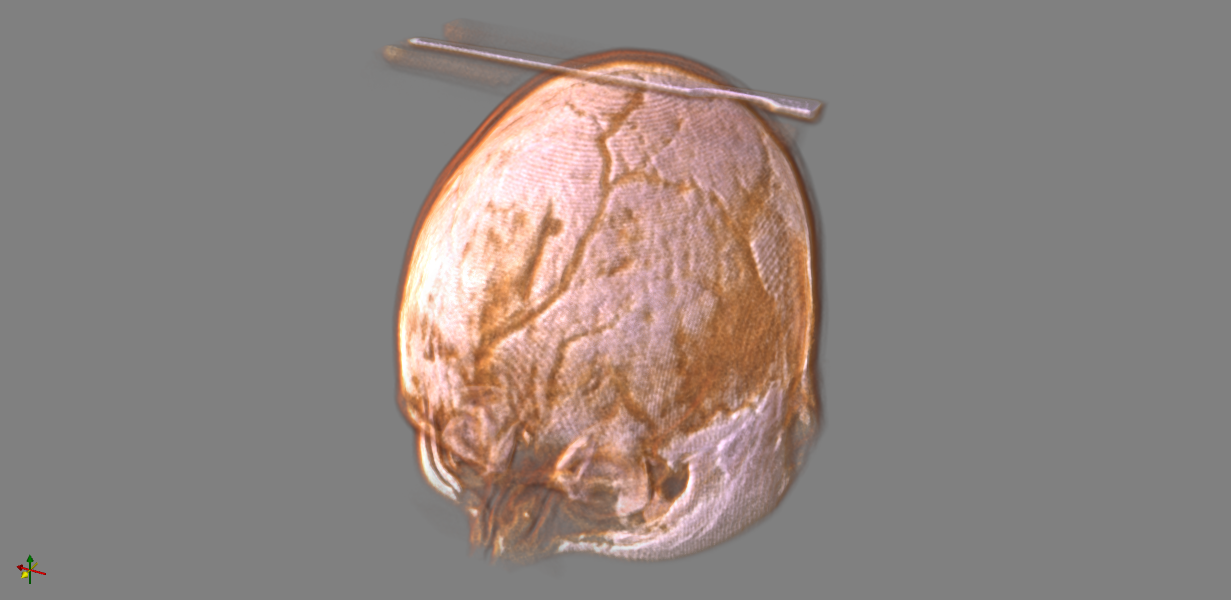

<IPython.core.display.Javascript object>

In [11]:
view(input_image)

In [12]:
deformed = itk.resample_image_filter(
    input_image,
    use_reference_image=True,
    reference_image=input_image,
    transform=thin_plate_spline,
)

In [13]:
itk.imwrite(deformed, deformed_image)


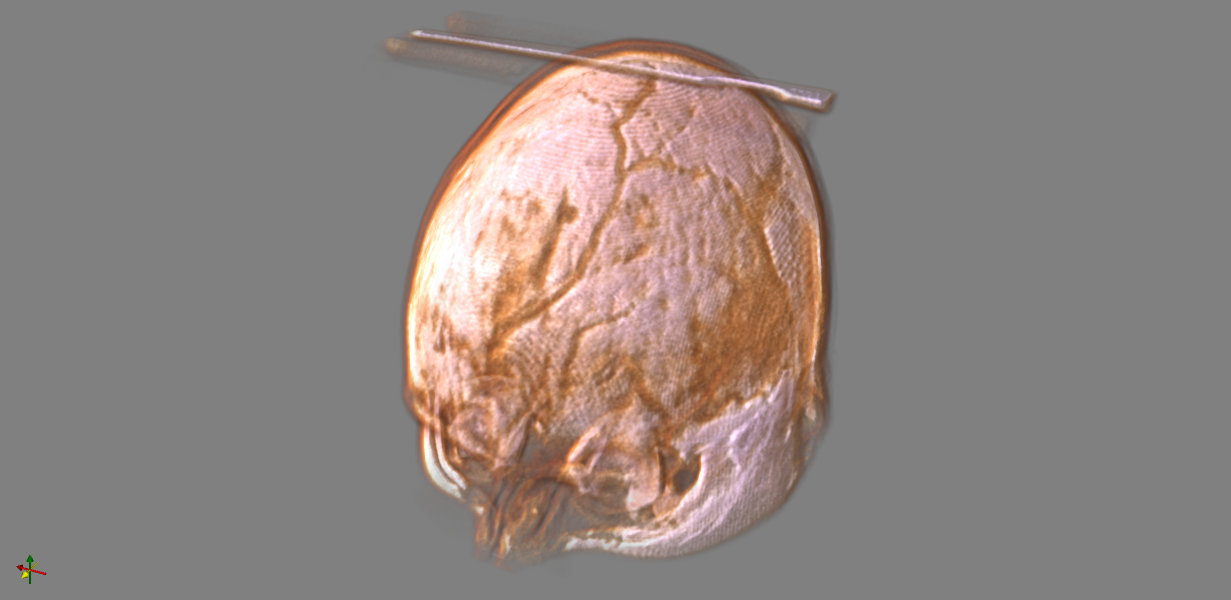
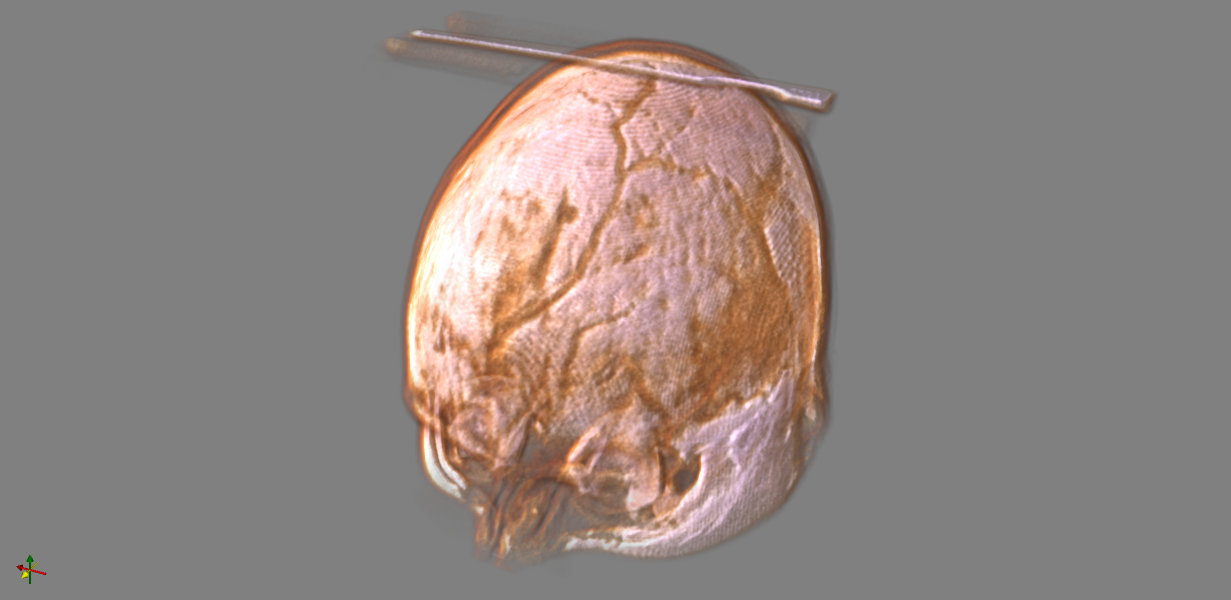

<IPython.core.display.Javascript object>

In [14]:
view(deformed)

In [15]:
checker_board = itk.checker_board_image_filter(input_image, deformed)
itk.imwrite(checker_board, checker_board_image)


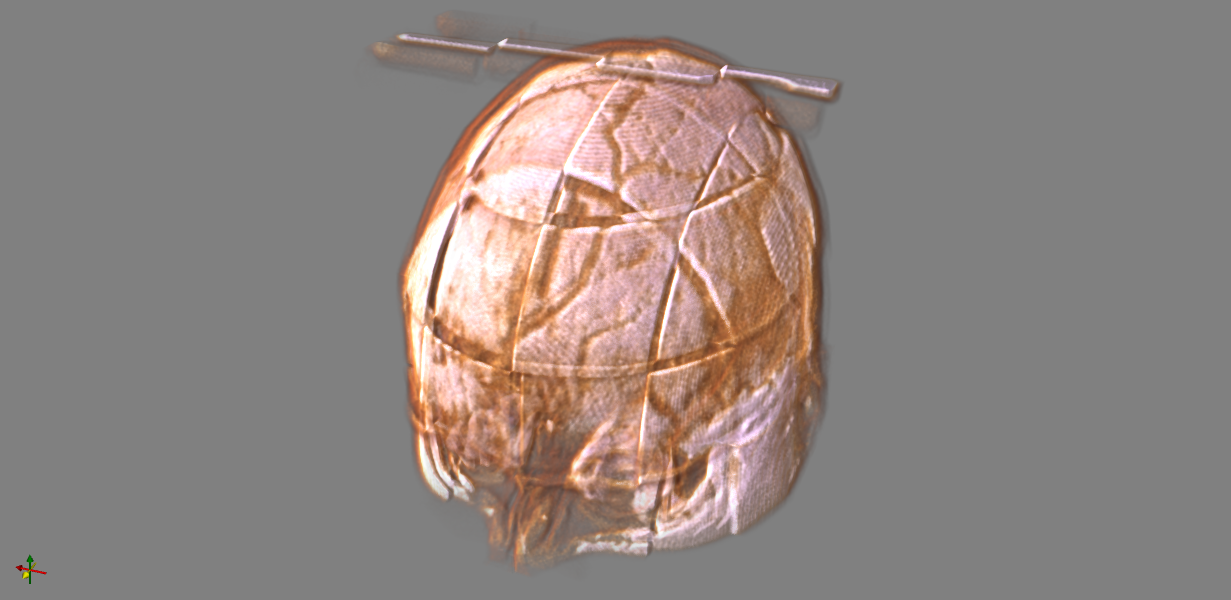
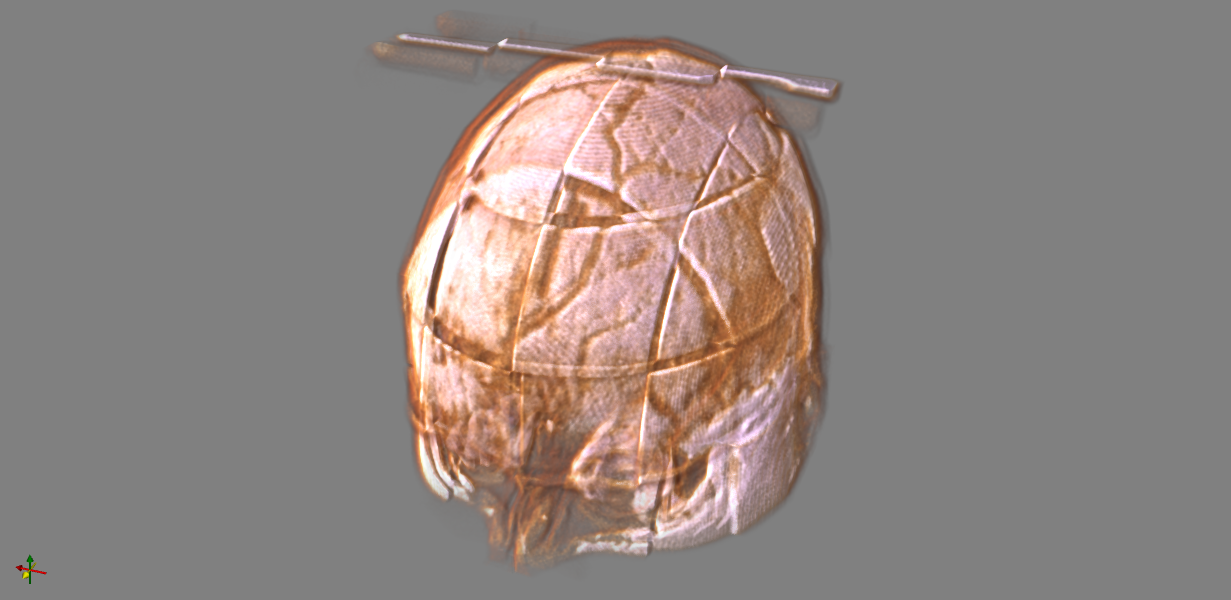

<IPython.core.display.Javascript object>

In [16]:
view(checker_board)